In [45]:
import pandas as pd

In [46]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/predictions/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [47]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [48]:
# add sampoles names to the predictions for ICA
pred_ICA["Sample Name"] = pred_ICA["Sample Name"].apply(lambda x: x.split("_")[0])

In [49]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,bcr2_2013_08_06_175701_ccs,47.817587,2.321485,14.792030,11.750231,11.236553,5.888396,7.199853,2.728997,bcr2
1,bcr2_2013_08_06_180332_ccs,58.444854,1.550624,15.301236,17.368664,4.913217,6.134957,5.420982,0.681593,bcr2
2,bcr2_2013_08_06_180202_ccs,50.547933,2.877592,14.801240,14.410654,8.091249,6.976767,4.808272,1.868105,bcr2
3,bcr2_2013_08_06_175843_ccs,64.574815,1.797002,18.059769,13.913655,11.586482,10.295680,1.685019,2.157638,bcr2
4,bcr2_2013_08_06_180028_ccs,45.958092,3.177127,17.145941,8.567183,10.406910,14.381217,0.535931,1.611353,bcr2


In [50]:
# filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [51]:
aligned_pred_PLS_SM, aligned_pred_ICA = pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [52]:
aligned_pred_PLS_SM

,Sample Name,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
ID,,,,,,,,,
p4mt_2013_10_28_162025_ccs,p4mt,59.357253,0.757467,20.446113,6.386238,3.120660,0.949509,1.442986,3.251306
p4mt_2013_10_28_161555_ccs,p4mt,61.991969,0.777374,18.980136,5.894336,2.854611,0.849555,1.423989,2.918415
p4mt_2013_10_28_161854_ccs,p4mt,61.999206,0.603786,18.415403,6.447442,3.001933,0.889052,1.281427,2.886824
p4mt_2013_10_28_162157_ccs,p4mt,61.665760,0.680658,18.803199,6.126330,2.989403,1.013087,1.512972,2.981266
p4mt_2013_10_28_161724_ccs,p4mt,60.453571,0.707316,19.808492,6.620144,3.028984,0.944363,1.360410,3.096275
...,...,...,...,...,...,...,...,...,...
mo7_2013_08_19_153808_ccs,mo7,47.123915,2.059543,15.899018,9.397457,4.631876,12.581806,3.031190,1.669389
mo7_2013_08_19_154019_ccs,mo7,47.804559,2.347802,15.789305,10.138054,5.750638,12.559852,3.661356,2.354144
mo7_2013_08_19_154449_ccs,mo7,48.245274,1.869280,15.154208,10.944423,7.072370,10.882815,3.284901,1.991756


In [53]:
merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on=['ID', 'Sample Name'], suffixes=('_ICA', '_PLS_SM'))

In [54]:
merged_df

,SiO2_ICA,TiO2_ICA,Al2O3_ICA,FeOT_ICA,MgO_ICA,CaO_ICA,Na2O_ICA,K2O_ICA,Sample Name,SiO2_PLS_SM,TiO2_PLS_SM,Al2O3_PLS_SM,FeOT_PLS_SM,MgO_PLS_SM,CaO_PLS_SM,Na2O_PLS_SM,K2O_PLS_SM
ID,,,,,,,,,,,,,,,,,
p4mt_2013_10_28_162025_ccs,62.999482,0.799126,22.259724,7.343106,2.372045,-4.246049,2.778665,4.348479,p4mt,59.357253,0.757467,20.446113,6.386238,3.120660,0.949509,1.442986,3.251306
p4mt_2013_10_28_161555_ccs,70.219755,0.152477,19.226422,6.371026,3.323479,-3.586580,2.362391,3.616793,p4mt,61.991969,0.777374,18.980136,5.894336,2.854611,0.849555,1.423989,2.918415
p4mt_2013_10_28_161854_ccs,60.973185,0.759022,19.134360,8.569408,2.984369,0.959360,3.891834,3.676564,p4mt,61.999206,0.603786,18.415403,6.447442,3.001933,0.889052,1.281427,2.886824
p4mt_2013_10_28_162157_ccs,59.003701,1.016893,19.305785,9.067772,5.736957,1.034209,1.569092,4.159390,p4mt,61.665760,0.680658,18.803199,6.126330,2.989403,1.013087,1.512972,2.981266
p4mt_2013_10_28_161724_ccs,62.548878,0.688630,18.555742,7.987449,3.631106,1.187481,2.317457,2.926770,p4mt,60.453571,0.707316,19.808492,6.620144,3.028984,0.944363,1.360410,3.096275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mo7_2013_08_19_153808_ccs,47.510863,2.977225,18.888882,13.920715,8.469698,6.085642,8.545247,2.210964,mo7,47.123915,2.059543,15.899018,9.397457,4.631876,12.581806,3.031190,1.669389
mo7_2013_08_19_154019_ccs,47.534254,1.666245,13.291856,7.589530,5.048106,14.056624,1.381913,2.504340,mo7,47.804559,2.347802,15.789305,10.138054,5.750638,12.559852,3.661356,2.354144
mo7_2013_08_19_154449_ccs,59.129479,2.176034,19.216893,8.515701,4.824270,19.720859,4.156472,3.006339,mo7,48.245274,1.869280,15.154208,10.944423,7.072370,10.882815,3.284901,1.991756


In [55]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [56]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
ID,,,,,,,,,,
p4mt_2013_10_28_162025_ccs,61.178367,0.778296,20.899516,6.625455,2.746353,-1.648270,2.244394,4.074186,p4mt,p4mt_2013_10_28_162025_ccs
p4mt_2013_10_28_161555_ccs,66.105862,0.464925,19.041707,6.013508,3.089045,-1.368512,1.987030,3.442198,p4mt,p4mt_2013_10_28_161555_ccs
p4mt_2013_10_28_161854_ccs,61.486196,0.681404,18.595142,6.977933,2.993151,0.924206,2.847672,3.479129,p4mt,p4mt_2013_10_28_161854_ccs
p4mt_2013_10_28_162157_ccs,60.334731,0.848776,18.928845,6.861691,4.363180,1.023648,1.546644,3.864859,p4mt,p4mt_2013_10_28_162157_ccs
p4mt_2013_10_28_161724_ccs,61.501224,0.697973,19.495304,6.961970,3.330045,1.065922,1.934638,2.969146,p4mt,p4mt_2013_10_28_161724_ccs
...,...,...,...,...,...,...,...,...,...,...
mo7_2013_08_19_153808_ccs,47.317389,2.518384,16.646484,10.528271,6.550787,9.333724,6.339624,2.075570,mo7,mo7_2013_08_19_153808_ccs
mo7_2013_08_19_154019_ccs,47.669407,2.007024,15.164943,9.500923,5.399372,13.308238,2.293690,2.466791,mo7,mo7_2013_08_19_154019_ccs
mo7_2013_08_19_154449_ccs,53.687377,2.022657,16.169879,10.337242,5.948320,15.301837,3.807844,2.752693,mo7,mo7_2013_08_19_154449_ccs


In [57]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [58]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [59]:
from sklearn.metrics import mean_squared_error

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_moc_actual_df = merge_with_actual_data(moc_predictions)
moc_rmse_values = calculate_rmse(merged_moc_actual_df)

In [60]:
SiO2_eval_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_moc_actual_df[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

SiO2_eval_df = SiO2_eval_df[0:5]
SiO2_eval_df

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,62.999482,59.357253,p4mt,63.43,61.178367
1,62.999482,59.357253,p4mt,63.43,66.105862
2,62.999482,59.357253,p4mt,63.43,61.486196
3,62.999482,59.357253,p4mt,63.43,60.334731
4,62.999482,59.357253,p4mt,63.43,61.501224


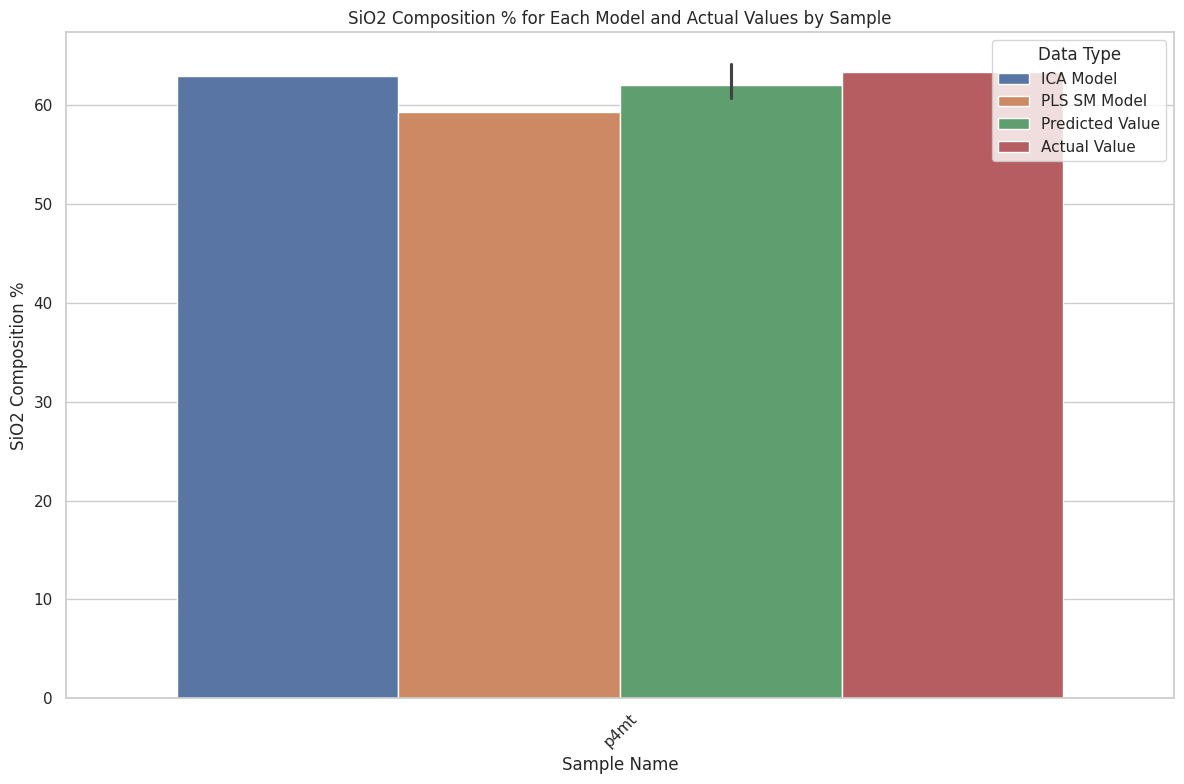

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure for the plot
plt.figure(figsize=(12, 8))

# Creating aliases for the value_vars
aliases = {
    'SiO2_ICA': 'ICA Model',
    'SiO2_PLS_SM': 'PLS SM Model',
    'SiO2_pred': 'Predicted Value',
    'SiO2_actual': 'Actual Value'
}

# Merging the data for actual and predicted values for the plot
melted_data = pd.melt(SiO2_eval_df, id_vars='Sample Name', value_vars=list(aliases.keys()))

# Renaming the columns based on aliases
melted_data = melted_data.rename(columns={'variable': 'Model/Value', 'value': 'SiO2 Composition %'})
melted_data['Model/Value'] = melted_data['Model/Value'].map(aliases)

# Creating the grouped bar chart
sns.barplot(x='Sample Name', y='SiO2 Composition %', hue='Model/Value', data=melted_data)

# Adding labels and title
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Composition %')
plt.title('SiO2 Composition % for Each Model and Actual Values by Sample')
plt.xticks(rotation=45)
plt.legend(title='Data Type')

plt.gca().invert_yaxis()

# Displaying the plot
plt.tight_layout()
plt.show()

In [62]:
merged_moc_actual_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
p4mt_2013_10_28_162025_ccs,61.178367,63.43,0.778296,0.69,20.899516,17.24,6.625455,5.87,2.746353,2.66,-1.648270,0.87,2.244394,1.51,4.074186,2.6,p4mt
p4mt_2013_10_28_161555_ccs,66.105862,63.43,0.464925,0.69,19.041707,17.24,6.013508,5.87,3.089045,2.66,-1.368512,0.87,1.987030,1.51,3.442198,2.6,p4mt
p4mt_2013_10_28_161854_ccs,61.486196,63.43,0.681404,0.69,18.595142,17.24,6.977933,5.87,2.993151,2.66,0.924206,0.87,2.847672,1.51,3.479129,2.6,p4mt
p4mt_2013_10_28_162157_ccs,60.334731,63.43,0.848776,0.69,18.928845,17.24,6.861691,5.87,4.363180,2.66,1.023648,0.87,1.546644,1.51,3.864859,2.6,p4mt
p4mt_2013_10_28_161724_ccs,61.501224,63.43,0.697973,0.69,19.495304,17.24,6.961970,5.87,3.330045,2.66,1.065922,0.87,1.934638,1.51,2.969146,2.6,p4mt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mo7_2013_08_19_153808_ccs,47.317389,40.79,2.518384,3.39,16.646484,17.60,10.528271,11.12,6.550787,6.46,9.333724,14.62,6.339624,2.05,2.075570,0.75,mo7
mo7_2013_08_19_154019_ccs,47.669407,40.79,2.007024,3.39,15.164943,17.60,9.500923,11.12,5.399372,6.46,13.308238,14.62,2.293690,2.05,2.466791,0.75,mo7
mo7_2013_08_19_154449_ccs,53.687377,40.79,2.022657,3.39,16.169879,17.60,10.337242,11.12,5.948320,6.46,15.301837,14.62,3.807844,2.05,2.752693,0.75,mo7
mo7_2013_08_19_154311_ccs,46.148630,40.79,2.666035,3.39,15.027170,17.60,9.801764,11.12,6.200308,6.46,12.198049,14.62,5.650649,2.05,3.009983,0.75,mo7


In [63]:
moc_rmse_values

{'SiO2': 5.642829530062285,
 'TiO2': 0.48031071481749393,
 'Al2O3': 1.8373024362612895,
 'FeOT': 1.816817648895239,
 'MgO': 1.560392917306166,
 'CaO': 2.0880077403241906,
 'Na2O': 1.3412840010867966,
 'K2O': 1.1559402413914803}

In [64]:
ICA_actual_merged_df = merge_with_actual_data(aligned_pred_ICA)
ICA_rmses = calculate_rmse(ICA_actual_merged_df)

PLS_SM_actual_merged_df = merge_with_actual_data(aligned_pred_PLS_SM)
PLS_SM_rmses = calculate_rmse(PLS_SM_actual_merged_df)

ICA_rmses

{'SiO2': 8.663764867228195,
 'TiO2': 0.5387303642439318,
 'Al2O3': 3.3655920573428686,
 'FeOT': 2.869525355955239,
 'MgO': 3.0981529550994478,
 'CaO': 3.2783874139885696,
 'Na2O': 2.1142700878319234,
 'K2O': 1.3744727096596538}

In [65]:
PLS_SM_actual_merged_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
p4mt_2013_10_28_162025_ccs,59.357253,63.43,0.757467,0.69,20.446113,17.24,6.386238,5.87,3.120660,2.66,0.949509,0.87,1.442986,1.51,3.251306,2.6,p4mt
p4mt_2013_10_28_161555_ccs,61.991969,63.43,0.777374,0.69,18.980136,17.24,5.894336,5.87,2.854611,2.66,0.849555,0.87,1.423989,1.51,2.918415,2.6,p4mt
p4mt_2013_10_28_161854_ccs,61.999206,63.43,0.603786,0.69,18.415403,17.24,6.447442,5.87,3.001933,2.66,0.889052,0.87,1.281427,1.51,2.886824,2.6,p4mt
p4mt_2013_10_28_162157_ccs,61.665760,63.43,0.680658,0.69,18.803199,17.24,6.126330,5.87,2.989403,2.66,1.013087,0.87,1.512972,1.51,2.981266,2.6,p4mt
p4mt_2013_10_28_161724_ccs,60.453571,63.43,0.707316,0.69,19.808492,17.24,6.620144,5.87,3.028984,2.66,0.944363,0.87,1.360410,1.51,3.096275,2.6,p4mt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mo7_2013_08_19_153808_ccs,47.123915,40.79,2.059543,3.39,15.899018,17.60,9.397457,11.12,4.631876,6.46,12.581806,14.62,3.031190,2.05,1.669389,0.75,mo7
mo7_2013_08_19_154019_ccs,47.804559,40.79,2.347802,3.39,15.789305,17.60,10.138054,11.12,5.750638,6.46,12.559852,14.62,3.661356,2.05,2.354144,0.75,mo7
mo7_2013_08_19_154449_ccs,48.245274,40.79,1.869280,3.39,15.154208,17.60,10.944423,11.12,7.072370,6.46,10.882815,14.62,3.284901,2.05,1.991756,0.75,mo7
mo7_2013_08_19_154311_ccs,47.759476,40.79,2.502836,3.39,14.705789,17.60,10.615901,11.12,5.859436,6.46,13.044168,14.62,3.444403,2.05,2.512990,0.75,mo7


In [66]:
PLS_SM_rmses

{'SiO2': 4.519187675909356,
 'TiO2': 0.500392153658139,
 'Al2O3': 1.7950015814441802,
 'FeOT': 1.9425891221629286,
 'MgO': 0.9089425600817317,
 'CaO': 1.7705154790793995,
 'Na2O': 0.8158839412116873,
 'K2O': 0.7321885767522743}

In [67]:
RMSEs_df = pd.DataFrame([ICA_rmses, PLS_SM_rmses, moc_rmse_values], index=["ICA (replica)", "PLS_SM (replica)", "MOC (replica)"])

In [68]:
RMSEs_df.T

,ICA (replica),PLS_SM (replica),MOC (replica)
SiO2,8.663765,4.519188,5.642830
TiO2,0.538730,0.500392,0.480311
Al2O3,3.365592,1.795002,1.837302
FeOT,2.869525,1.942589,1.816818
MgO,3.098153,0.908943,1.560393
CaO,3.278387,1.770515,2.088008
Na2O,2.114270,0.815884,1.341284
K2O,1.374473,0.732189,1.155940


In [69]:
MOC_model_rmses = {
    'SiO2': 5.83,
    'TiO2': 1.10,
    'Al2O3': 3.18,
    'FeOT': 2.90,
    'MgO': 2.30,
    'CaO': 1.14,
    'Na2O': 1.34,
    'K2O': 1.49
 }

ICA_original_rmses = {
    'SiO2': 8.31,
    'TiO2': 1.44,
    'Al2O3': 4.77,
    'FeOT': 5.17,
    'MgO': 4.08,
    'CaO': 3.07,
    'Na2O': 2.29,
    'K2O': 0.98
 }

PLS_SM_original_rmses = {
    'SiO2': 4.33,
    'TiO2': 0.94,
    'Al2O3': 2.85,
    'FeOT': 2.01,
    'MgO': 1.06,
    'CaO': 2.65,
    'Na2O': 0.62,
    'K2O': 0.72
 }

In [70]:
R_df = RMSEs_df.T
R_df['MOC (original)'] = MOC_model_rmses.values()
R_df['ICA (original)'] = ICA_original_rmses.values()
R_df['PLS_SM (original)'] = PLS_SM_original_rmses.values()

In [71]:
R_df
# R_df.to_csv("eval.csv")

,ICA (replica),PLS_SM (replica),MOC (replica),MOC (original),ICA (original),PLS_SM (original)
SiO2,8.663765,4.519188,5.642830,5.83,8.31,4.33
TiO2,0.538730,0.500392,0.480311,1.10,1.44,0.94
Al2O3,3.365592,1.795002,1.837302,3.18,4.77,2.85
FeOT,2.869525,1.942589,1.816818,2.90,5.17,2.01
MgO,3.098153,0.908943,1.560393,2.30,4.08,1.06
CaO,3.278387,1.770515,2.088008,1.14,3.07,2.65
Na2O,2.114270,0.815884,1.341284,1.34,2.29,0.62
K2O,1.374473,0.732189,1.155940,1.49,0.98,0.72


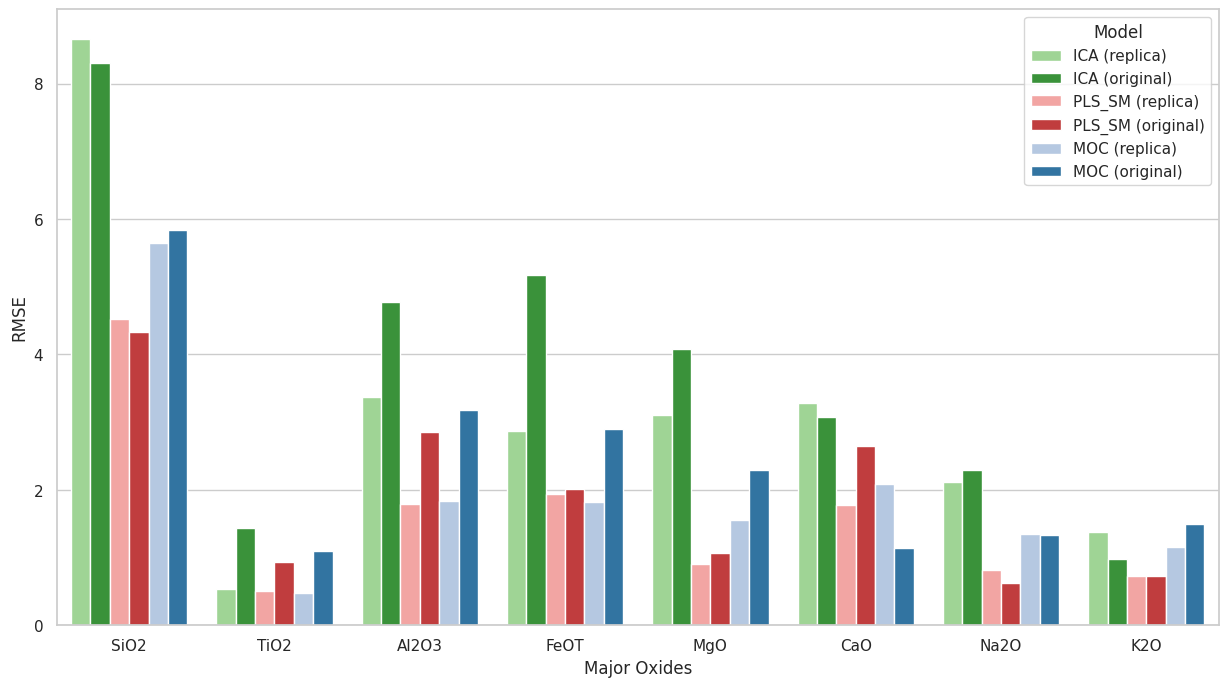

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reordering columns to alternate between replica and original
column_order = ['ICA (replica)', 'ICA (original)', 'PLS_SM (replica)', 'PLS_SM (original)', 'MOC (replica)', 'MOC (original)']
R_df = R_df[column_order]

# Melting the DataFrame
R_df_melted = R_df.reset_index().melt(id_vars='index')
R_df_melted.columns = ['Major Oxides', 'Model', 'RMSE']

# Setting Seaborn style
sns.set(style="whitegrid")

# Define a more balanced color palette
palette = {
    'MOC (original)': '#1f77b4',  # Slightly darker blue
    'ICA (original)': '#2ca02c',  # Slightly darker green
    'PLS_SM (original)': '#d62728',  # Slightly darker red
    'MOC (replica)': '#aec7e8',  # Lighter blue
    'ICA (replica)': '#98df8a',  # Lighter green
    'PLS_SM (replica)': '#ff9896'  # Lighter red
}

# Creating the plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Major Oxides', y='RMSE', hue='Model', data=R_df_melted, palette=palette)

# Adding labels and title
ax.set_xlabel('Major Oxides')
ax.set_ylabel('RMSE')
# ax.set_title('Grouped Histogram for Major Oxides')

# Adjust legend
plt.legend(title='Model')

# Display the plot
plt.show()


In [73]:
import numpy as np
np.around(np.array(list(moc_rmse_values.values())), 2)

array([5.64, 0.48, 1.84, 1.82, 1.56, 2.09, 1.34, 1.16])